In [ ]:
# установка катбуста и активация нужных параметров
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/mushrooms_small.tsv", sep='\t')
df

,class,cap-shape,cap-color,bruises,gill-attachment,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,veil-type,veil-color,ring-number,population
0,p,x,n,t,f,k,e,s,s,w,p,w,o,s
1,e,x,y,t,f,k,e,s,s,w,p,w,o,n
2,e,b,w,t,f,n,e,s,s,w,p,w,o,n
3,p,x,w,t,f,n,e,s,s,w,p,w,o,s
4,e,x,g,f,f,k,t,s,s,w,p,w,o,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,n,f,a,y,e,s,s,o,p,o,o,c
8120,e,x,n,f,a,y,e,s,s,o,p,n,o,v
8121,e,f,n,f,a,n,e,s,s,o,p,o,o,c
8122,p,k,n,f,f,b,t,s,k,w,p,w,o,v


In [3]:
df.columns

Index(['class', 'cap-shape', 'cap-color', 'bruises', 'gill-attachment',
       'gill-color', 'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring', 'veil-type',
       'veil-color', 'ring-number', 'population'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   gill-attachment           8124 non-null   object
 5   gill-color                8124 non-null   object
 6   stalk-shape               8124 non-null   object
 7   stalk-surface-above-ring  8124 non-null   object
 8   stalk-surface-below-ring  8124 non-null   object
 9   stalk-color-above-ring    8124 non-null   object
 10  veil-type                 8124 non-null   object
 11  veil-color                8124 non-null   object
 12  ring-number               8124 non-null   object
 13  population                8124 non-null   object
dtypes: object(14)
memory usa

In [5]:
# сколько категорий в каждом столбце
df.nunique()

class                        2
cap-shape                    6
cap-color                   10
bruises                      2
gill-attachment              2
gill-color                  12
stalk-shape                  2
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
population                   6
dtype: int64

In [6]:
df.isna().sum()

class                       0
cap-shape                   0
cap-color                   0
bruises                     0
gill-attachment             0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
population                  0
dtype: int64

In [7]:
X, y = df.drop(columns='class'), df['class'] # отделим лейблы

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3+2+2024)

# Обучим как-то простую модель

In [14]:
y.value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [16]:
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)
y_encoded = y.map({'p':1, 'e':0})

In [18]:
X_encoded.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y', 'bruises_t', 'gill-attachment_f',
       'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k',
       'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r',
       'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_t',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y',
       'stalk-color-above-ring_c', 'stalk-color-above-ring_e',
       'stalk-color-above-ring_g', 'stalk-color-above-ring_n',
       'stalk-color-above-ring_o', 'stalk-color-above-ring_p',
       'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 'veil-color_o',
       'veil-color_w', 'veil-color_y', 'ring-

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.25, random_state=3+2+2024)

In [20]:
X_train.shape, X_test.shape

((6093, 52), (2031, 52))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.metrics import f1_score

In [23]:
models = dict(
    LogReg = LogisticRegression(),
    KNN = KNeighborsClassifier(),
    SVM = SVC(),
    Tree = DecisionTreeClassifier(),
    RandomForest = RandomForestClassifier()
)

In [24]:
prefit = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    prefit[model_name] = dict(model=model, score=round(f1_score(y_test, y_pred), 3))
prefit

{'LogReg': {'model': LogisticRegression(), 'score': 0.944},
 'KNN': {'model': KNeighborsClassifier(), 'score': 0.985},
 'SVM': {'model': SVC(), 'score': 0.986},
 'Tree': {'model': DecisionTreeClassifier(), 'score': 0.992},
 'RandomForest': {'model': RandomForestClassifier(), 'score': 0.993}}

In [25]:
prefit['LogReg']

{'model': LogisticRegression(), 'score': 0.944}

In [27]:
prefit['LogReg']['model'].coef_

array([[ 1.19664187,  1.56609916,  1.35911083, -1.20542335,  1.48385607,
        -4.05430216, -2.41568037, -1.88688314, -2.42073094,  1.51677144,
        -3.14304601, -3.48661317, -1.62950292, -3.56893182,  1.05789685,
         1.30246916, -4.10074071, -4.51107548, -3.40774925, -5.28892273,
        -5.50635054, -1.26301459, -4.57146583,  0.95159188, -5.39071847,
        -4.84259376, -1.12772587, -2.76345481,  2.76899577, -0.98013479,
         1.14842992,  1.77989074, -0.31979207, -1.89791521,  3.06781114,
        -1.61652848, -3.31723982,  1.18895876, -3.04812249, -0.80069311,
        -0.43495089,  1.19542629, -0.93328097,  2.23857338,  1.19542629,
         1.21282584, -3.89475979,  1.33947689, -2.23451669,  2.13237594,
         3.33574387,  0.54297417]])

In [28]:
imp = pd.DataFrame({'cols': X_train.columns, 'coef':prefit['LogReg']['model'].coef_[0]})
imp['abs'] = imp.coef.abs()
imp = imp.sort_values(by='abs', ascending=False)
imp.head(20)

,cols,coef,abs
20,gill-color_n,-5.506351,5.506351
24,gill-color_u,-5.390718,5.390718
19,gill-color_k,-5.288923,5.288923
25,gill-color_w,-4.842594,4.842594
22,gill-color_p,-4.571466,4.571466
17,gill-color_g,-4.511075,4.511075
16,gill-color_e,-4.100741,4.100741
5,cap-color_c,-4.054302,4.054302
46,ring-number_t,-3.894760,3.894760
13,cap-color_y,-3.568932,3.568932


In [30]:
imp[imp['cols'].str.contains('gill-color')]

,cols,coef,abs
20,gill-color_n,-5.506351,5.506351
24,gill-color_u,-5.390718,5.390718
19,gill-color_k,-5.288923,5.288923
25,gill-color_w,-4.842594,4.842594
22,gill-color_p,-4.571466,4.571466
17,gill-color_g,-4.511075,4.511075
16,gill-color_e,-4.100741,4.100741
18,gill-color_h,-3.407749,3.407749
21,gill-color_o,-1.263015,1.263015
26,gill-color_y,-1.127726,1.127726


# Catboost

In [32]:
import catboost
catboost.__version__

'1.2.2'

In [33]:
from catboost import CatBoostClassifier, Pool

In [34]:
# создаём простую модель
# https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

model = CatBoostClassifier(iterations=100,
                           depth=3,
                           learning_rate=0.5,
                   # если класс -- лейбл, используем LogLoss. Если класс -- вероятность, используем кросс-энтропию
                           loss_function='Logloss', 
                           verbose=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=3+2+2024)

In [36]:
# подготовим данные в нужном формате
data_train = Pool(data=X_train, label=y_train, cat_features=X_train.columns.values)
data_test = Pool(data=X_test, label=y_test, cat_features=X_test.columns.values)

In [38]:
# учим модель
model.fit(data_train)

0:	learn: 0.5374872	total: 19.2ms	remaining: 1.9s
1:	learn: 0.4403072	total: 58.3ms	remaining: 2.86s
2:	learn: 0.3692793	total: 104ms	remaining: 3.38s
3:	learn: 0.3083447	total: 133ms	remaining: 3.19s
4:	learn: 0.2848719	total: 159ms	remaining: 3.03s
5:	learn: 0.2645247	total: 191ms	remaining: 2.99s
6:	learn: 0.2485304	total: 223ms	remaining: 2.97s
7:	learn: 0.2372013	total: 256ms	remaining: 2.94s
8:	learn: 0.2205632	total: 294ms	remaining: 2.97s
9:	learn: 0.2131187	total: 344ms	remaining: 3.09s
10:	learn: 0.2051557	total: 366ms	remaining: 2.96s
11:	learn: 0.1908244	total: 385ms	remaining: 2.82s
12:	learn: 0.1790248	total: 411ms	remaining: 2.75s
13:	learn: 0.1737782	total: 433ms	remaining: 2.66s
14:	learn: 0.1667598	total: 461ms	remaining: 2.61s
15:	learn: 0.1654986	total: 488ms	remaining: 2.56s
16:	learn: 0.1530436	total: 508ms	remaining: 2.48s
17:	learn: 0.1500138	total: 533ms	remaining: 2.43s
18:	learn: 0.1376802	total: 559ms	remaining: 2.38s
19:	learn: 0.1339959	total: 583ms	remain

In [39]:
# реже выводим информацию
model.fit(data_train, 
         metric_period = 10)

0:	learn: 0.5374872	total: 17.7ms	remaining: 1.75s
10:	learn: 0.2051557	total: 294ms	remaining: 2.38s
20:	learn: 0.1337812	total: 566ms	remaining: 2.13s
30:	learn: 0.1194882	total: 795ms	remaining: 1.77s
40:	learn: 0.0999854	total: 1.01s	remaining: 1.45s
50:	learn: 0.0913284	total: 1.26s	remaining: 1.21s
60:	learn: 0.0798069	total: 1.48s	remaining: 948ms
70:	learn: 0.0676880	total: 1.74s	remaining: 709ms
80:	learn: 0.0654496	total: 2.01s	remaining: 471ms
90:	learn: 0.0568528	total: 2.27s	remaining: 225ms
99:	learn: 0.0540932	total: 2.5s	remaining: 0us


In [40]:
# интерактивный монитор
model.fit(data_train, 
          plot=True, 
          silent=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [41]:
print("Model is fitted: {}".format(model.is_fitted()))
print(model.get_params())
print("Best score: {}".format(model.best_score_))

Model is fitted: True
{'iterations': 100, 'learning_rate': 0.5, 'depth': 3, 'loss_function': 'Logloss', 'verbose': True}
Best score: {'learn': {'Logloss': 0.05409321811336932}}


## Добавим валидацию

In [42]:
# учим модель
model = CatBoostClassifier(iterations=100,
                                   depth=3,
                                   learning_rate=0.5,
                                   loss_function='Logloss', 
                                   eval_metric='F1')

model.fit(data_train, 
          # plot=True, 
          # silent=True,
          eval_set=data_test)
         

0:	learn: 0.7091566	test: 0.7055098	best: 0.7055098 (0)	total: 24.7ms	remaining: 2.44s
1:	learn: 0.7961477	test: 0.7985697	best: 0.7985697 (1)	total: 58.5ms	remaining: 2.87s
2:	learn: 0.8722192	test: 0.8697068	best: 0.8697068 (2)	total: 87.4ms	remaining: 2.82s
3:	learn: 0.8760361	test: 0.8735005	best: 0.8735005 (3)	total: 118ms	remaining: 2.83s
4:	learn: 0.8722212	test: 0.8652406	best: 0.8735005 (3)	total: 145ms	remaining: 2.75s
5:	learn: 0.8827885	test: 0.8790623	best: 0.8790623 (5)	total: 180ms	remaining: 2.83s
6:	learn: 0.8913994	test: 0.8885299	best: 0.8885299 (6)	total: 206ms	remaining: 2.74s
7:	learn: 0.8991260	test: 0.8964037	best: 0.8964037 (7)	total: 236ms	remaining: 2.72s
8:	learn: 0.9042726	test: 0.9046351	best: 0.9046351 (8)	total: 270ms	remaining: 2.73s
9:	learn: 0.9051042	test: 0.9044314	best: 0.9046351 (8)	total: 296ms	remaining: 2.67s
10:	learn: 0.9071942	test: 0.9059011	best: 0.9059011 (10)	total: 320ms	remaining: 2.59s
11:	learn: 0.9182435	test: 0.9156118	best: 0.9156

In [57]:
model.fit(data_train, eval_set=data_test, metric_period=10)

0:	learn: 0.7091566	test: 0.7055098	best: 0.7055098 (0)	total: 19.4ms	remaining: 1.92s
10:	learn: 0.9071942	test: 0.9059011	best: 0.9059011 (10)	total: 237ms	remaining: 1.92s
20:	learn: 0.9458076	test: 0.9411765	best: 0.9411765 (20)	total: 489ms	remaining: 1.84s
30:	learn: 0.9476987	test: 0.9468250	best: 0.9468250 (30)	total: 717ms	remaining: 1.59s
40:	learn: 0.9580238	test: 0.9602041	best: 0.9602041 (40)	total: 965ms	remaining: 1.39s
50:	learn: 0.9633832	test: 0.9669883	best: 0.9669883 (50)	total: 1.19s	remaining: 1.14s
60:	learn: 0.9720423	test: 0.9726721	best: 0.9726721 (60)	total: 1.42s	remaining: 908ms
70:	learn: 0.9770056	test: 0.9742294	best: 0.9742294 (70)	total: 1.65s	remaining: 673ms
80:	learn: 0.9764826	test: 0.9747475	best: 0.9747475 (80)	total: 1.88s	remaining: 440ms
90:	learn: 0.9790781	test: 0.9788306	best: 0.9788306 (90)	total: 2.09s	remaining: 207ms
99:	learn: 0.9836177	test: 0.9822964	best: 0.9822964 (99)	total: 2.31s	remaining: 0us

bestTest = 0.9822964087
bestIterat

In [43]:
# увеличим число деревьев в два раза, до 200
model = CatBoostClassifier(iterations=200,
                                   depth=3,
                                   learning_rate=0.5,
                                   loss_function='Logloss', 
                                   eval_metric='F1')

model.fit(data_train, 
          # plot=True, 
          # silent=True,
          eval_set=data_test,
          metric_period = 50)
         

0:	learn: 0.8818026	test: 0.8831169	best: 0.8831169 (0)	total: 23.8ms	remaining: 4.74s
50:	learn: 0.9851510	test: 0.9818182	best: 0.9818182 (50)	total: 1.51s	remaining: 4.42s
100:	learn: 0.9917949	test: 0.9893886	best: 0.9893886 (100)	total: 3.02s	remaining: 2.96s
150:	learn: 0.9936590	test: 0.9913837	best: 0.9913837 (150)	total: 4.45s	remaining: 1.44s
199:	learn: 0.9940017	test: 0.9893671	best: 0.9913837 (150)	total: 5.99s	remaining: 0us

bestTest = 0.9913836797
bestIteration = 150

Shrink model to first 151 iterations.


In [ ]:
# Оптимизируется logloss, но наши целевые метрики не растут с одной из самых ранних итераций

In [44]:
# AUC
model = CatBoostClassifier(iterations=200,
                                   depth=3,
                                   learning_rate=0.5,
                                   loss_function='Logloss', 
                                   eval_metric='AUC')

model.fit(data_train, 
          # plot=True, 
          # silent=True,
          eval_set=data_test,
          metric_period = 50)
         

0:	test: 0.8953629	best: 0.8953629 (0)	total: 24.2ms	remaining: 4.82s
50:	test: 0.9992514	best: 0.9992514 (50)	total: 1.66s	remaining: 4.86s
100:	test: 0.9996385	best: 0.9996385 (100)	total: 3.1s	remaining: 3.03s
150:	test: 0.9996929	best: 0.9996929 (150)	total: 4.51s	remaining: 1.46s
199:	test: 0.9996987	best: 0.9996987 (199)	total: 5.95s	remaining: 0us

bestTest = 0.9996987011
bestIteration = 199



In [46]:
model = CatBoostClassifier(iterations=200,
                                   depth=3,
                                   learning_rate=0.5,
                                   loss_function='Logloss', 
                                   eval_metric='F1')

# добавим остановку обучения, если целевая метрика НЕ МЕНЯЕТСЯ в течение некоторого числа итераций
model.fit(data_train, 
          eval_set=data_test,
          metric_period=10,
          early_stopping_rounds=20)
         

0:	learn: 0.8818026	test: 0.8831169	best: 0.8831169 (0)	total: 28.4ms	remaining: 5.66s
10:	learn: 0.9710963	test: 0.9737108	best: 0.9742294 (9)	total: 342ms	remaining: 5.88s
20:	learn: 0.9704829	test: 0.9667339	best: 0.9742294 (9)	total: 639ms	remaining: 5.45s
30:	learn: 0.9769570	test: 0.9749750	best: 0.9759760 (25)	total: 921ms	remaining: 5.02s
40:	learn: 0.9846573	test: 0.9803130	best: 0.9808081 (39)	total: 1.25s	remaining: 4.83s
50:	learn: 0.9851510	test: 0.9818182	best: 0.9823143 (45)	total: 1.52s	remaining: 4.46s
60:	learn: 0.9895709	test: 0.9868421	best: 0.9878665 (54)	total: 1.81s	remaining: 4.13s
70:	learn: 0.9902614	test: 0.9883662	best: 0.9883662 (62)	total: 2.09s	remaining: 3.8s
80:	learn: 0.9906063	test: 0.9893886	best: 0.9893886 (77)	total: 2.42s	remaining: 3.56s
90:	learn: 0.9907755	test: 0.9893886	best: 0.9893993 (88)	total: 2.72s	remaining: 3.26s
100:	learn: 0.9917949	test: 0.9893886	best: 0.9893993 (88)	total: 3.02s	remaining: 2.96s
110:	learn: 0.9926357	test: 0.98988

In [63]:
# поменяем оптимизируемуб метрику на AUC
model = CatBoostClassifier(iterations=500,
                           learning_rate=0.25,
                           loss_function='Logloss', 
                           eval_metric='F1'
                          )

# добавим остановку обучения, если целевая метрика НЕ МЕНЯЕТСЯ в течение некоторого числа итераций
model.fit(data_train, 
          eval_set=data_test,
          metric_period=10,
         # early_stopping_rounds=20
         )
         

0:	learn: 0.8818026	test: 0.8831169	best: 0.8831169 (0)	total: 41.2ms	remaining: 20.6s
10:	learn: 0.9895135	test: 0.9898271	best: 0.9898271 (10)	total: 724ms	remaining: 32.2s
20:	learn: 0.9921233	test: 0.9924051	best: 0.9924051 (20)	total: 1.28s	remaining: 29.2s
30:	learn: 0.9933116	test: 0.9918782	best: 0.9924051 (20)	total: 1.88s	remaining: 28.4s
40:	learn: 0.9936546	test: 0.9918946	best: 0.9924051 (20)	total: 2.43s	remaining: 27.2s
50:	learn: 0.9940038	test: 0.9908999	best: 0.9924051 (20)	total: 3.03s	remaining: 26.7s
60:	learn: 0.9943445	test: 0.9923974	best: 0.9924051 (20)	total: 3.62s	remaining: 26.1s
70:	learn: 0.9945149	test: 0.9929006	best: 0.9929006 (70)	total: 4.25s	remaining: 25.7s
80:	learn: 0.9945149	test: 0.9929006	best: 0.9929006 (70)	total: 4.93s	remaining: 25.5s
90:	learn: 0.9946872	test: 0.9939086	best: 0.9939086 (90)	total: 5.57s	remaining: 25s
100:	learn: 0.9945168	test: 0.9939086	best: 0.9939086 (90)	total: 6.17s	remaining: 24.4s
110:	learn: 0.9948595	test: 0.9929

# Сравним модели

In [52]:
model1 = CatBoostClassifier(iterations=100,
                            depth=3,
                            learning_rate=0.5,
                            loss_function='Logloss', 
                            eval_metric='F1',
                            train_dir='lr0.5')
model2 = CatBoostClassifier(iterations=100,
                            depth=3,
                            learning_rate=1,
                            loss_function='Logloss', 
                            eval_metric='F1',
                            train_dir='lr1')


model1.fit(data_train, 
           eval_set=data_test,
           silent=True,)
model2.fit(data_train, 
           eval_set=data_test,
           silent=True,)

In [53]:
from catboost import MetricVisualizer
MetricVisualizer(['lr0.5', 'lr1']).start()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Кросс-валидация

In [54]:
from catboost import cv

params = {'loss_function': 'Logloss',
          'iterations': 100,
          'eval_metric': 'F1',
          'learning_rate':0.5}

cv_data = cv(
    params = params,
    pool = data_train,
    fold_count = 5,
    shuffle = True,
    partition_random_seed = 42,
    verbose=False,
   # plot = True,
   # stratified=True # пропорции в каждом фолде такие же, как и во всех данных
)

Training on fold [0/5]

bestTest = 0.994011976
bestIteration = 54

Training on fold [1/5]

bestTest = 0.9914236707
bestIteration = 34

Training on fold [2/5]

bestTest = 0.9948630137
bestIteration = 49

Training on fold [3/5]

bestTest = 0.9905579399
bestIteration = 85

Training on fold [4/5]

bestTest = 0.9939810834
bestIteration = 49



In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    "learning_rate": [0.0001, 0.01, 0.25, 0.75]
}

model = CatBoostClassifier(
    iterations = 50,
    metric_period=50,
    verbose=False,
    eval_metric='F1',
    cat_features=X_train.columns.values,
    early_stopping_rounds=20
)

scorer = make_scorer(f1_score, greater_is_better=True)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True, scoring=scorer)
results = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [56]:
results.best_estimator_

In [57]:
results.best_estimator_.get_params()

{'iterations': 50,
 'verbose': False,
 'metric_period': 50,
 'eval_metric': 'F1',
 'cat_features': array(['cap-shape', 'cap-color', 'bruises', 'gill-attachment',
        'gill-color', 'stalk-shape', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring', 'veil-type',
        'veil-color', 'ring-number', 'population'], dtype=object),
 'learning_rate': 0.75}

# Предскажем и оценим

In [64]:
model = CatBoostClassifier(
    eval_metric='F1',
    iterations=200,
#     learning_rate=0.5,
    early_stopping_rounds=20
)

model.fit(
    data_test,
    eval_set=data_test,
    metric_period=20,
#     silent=True,
#     plot=True
)

Learning rate set to 0.076027
0:	learn: 0.8807649	test: 0.8818542	best: 0.8818542 (0)	total: 50.2ms	remaining: 9.99s


20:	learn: 0.9628855	test: 0.9667014	best: 0.9672727 (19)	total: 1.18s	remaining: 10s
40:	learn: 0.9842560	test: 0.9883897	best: 0.9883897 (40)	total: 2.36s	remaining: 9.17s
60:	learn: 0.9863429	test: 0.9884014	best: 0.9889001 (42)	total: 3.42s	remaining: 7.79s
80:	learn: 0.9883662	test: 0.9904186	best: 0.9904186 (80)	total: 4.42s	remaining: 6.5s
100:	learn: 0.9893993	test: 0.9909274	best: 0.9909274 (87)	total: 5.53s	remaining: 5.42s
120:	learn: 0.9939271	test: 0.9919355	best: 0.9919355 (120)	total: 6.53s	remaining: 4.26s
140:	learn: 0.9934110	test: 0.9934110	best: 0.9934110 (132)	total: 7.58s	remaining: 3.17s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.9934110492
bestIteration = 132

Shrink model to first 133 iterations.


In [65]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 200,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'od_pval': 0,
 'random_score_type': 'NormalWithModelSizeDecrease',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'od_type': 'Iter',
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Border

In [68]:
model.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [69]:
model.predict_proba(X_test) # вероятности (получили путём применения сигмоиды к полученным значениями в листьях)

array([[1.49388796e-03, 9.98506112e-01],
       [9.51570051e-04, 9.99048430e-01],
       [1.21854334e-03, 9.98781457e-01],
       ...,
       [9.51299236e-01, 4.87007635e-02],
       [9.59978426e-01, 4.00215738e-02],
       [2.63352249e-01, 7.36647751e-01]])

In [71]:
# сырые значения функции предсказания
model.predict(X_test, prediction_type='RawFormulaVal')

array([ 6.50487818,  6.95644523,  6.70887983, ..., -2.97213396,
       -3.17749216,  1.02861734])

$$ S(x) = \frac{1}{1 + e^{-x}}$$

In [72]:
sigmoid = lambda x : 1 / (1 + np.exp(-x)) # написали сами сигмоиду

raw = model.predict(X_test, prediction_type='RawFormulaVal')

probabilities = sigmoid(raw)

In [73]:
raw

array([ 6.50487818,  6.95644523,  6.70887983, ..., -2.97213396,
       -3.17749216,  1.02861734])

In [74]:
probabilities

array([0.99850611, 0.99904843, 0.99878146, ..., 0.04870076, 0.04002157,
       0.73664775])

In [76]:
model.predict_proba(X_test)[:, 1]

array([0.99850611, 0.99904843, 0.99878146, ..., 0.04870076, 0.04002157,
       0.73664775])

In [77]:
(model.predict_proba(X_test)[:, 1] != probabilities).sum() # вероятности принадлежать целевому классу совпали везде

0

 # Feature importance

In [80]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,stalk-surface-above-ring,17.402337
1,stalk-shape,14.732265
2,gill-color,14.664058
3,population,14.038246
4,bruises,11.657317
5,cap-color,6.953865
6,stalk-surface-below-ring,5.896322
7,ring-number,5.641110
8,stalk-color-above-ring,4.242628
9,cap-shape,3.515007


In [81]:
model.get_feature_importance(prettified=True).Importances.sum()

99.99999999999996

# SHAP

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d
<img src="https://raw.githubusercontent.com/slundberg/shap/master/docs/artwork/mnist_image_plot.png" />

In [ ]:
# !pip install shap

In [82]:
shap_values = model.get_feature_importance(data_test, 'ShapValues')
shap_values

array([[ 0.3266285 ,  0.08794666,  0.56342688, ...,  0.25762658,
         1.23638663,  0.2564517 ],
       [ 0.25866065,  0.05470287,  0.6435108 , ...,  0.26470588,
         1.43622754,  0.2564517 ],
       [ 0.28105831,  0.44242432,  0.67143021, ...,  0.35059251,
         0.30093505,  0.2564517 ],
       ...,
       [-0.05735929, -0.32727818, -1.26752508, ...,  0.08101768,
         0.6447365 ,  0.2564517 ],
       [ 0.00556725, -1.06309769, -0.47752723, ...,  0.18317448,
        -0.41714003,  0.2564517 ],
       [ 0.01930499,  0.13165794, -0.08365483, ...,  0.26883273,
         0.15669938,  0.2564517 ]])

In [85]:
shap_values.shape

(2031, 14)

In [86]:
X_test.shape

(2031, 13)

In [87]:
expected_value = shap_values[1, -1]
expected_value

0.2564516957740967

In [88]:
shap_values = shap_values[:, :-1]

In [89]:
shap_values[1, :].shape

(13,)

In [90]:
y_test.values[1]

1

In [91]:
raw[1]

6.9564452296589465

In [92]:
sigmoid(raw[1])

0.9990484299494299

In [108]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[1, :], X_test.iloc[1, :], link ='identity', )

In [109]:
y_test.values[5]

0

In [112]:
np.exp(0.5)

1.6487212707001282

In [110]:
raw[5]

-5.275603462616689

In [113]:
shap.initjs() # пример, где признаки вносят "отрицательный" вклад
shap.force_plot(expected_value, shap_values[5, :], X_test.iloc[5, :])

In [114]:
shap_values = model.get_feature_importance(data_test, 'ShapValues')
shap_values

array([[ 0.3266285 ,  0.08794666,  0.56342688, ...,  0.25762658,
         1.23638663,  0.2564517 ],
       [ 0.25866065,  0.05470287,  0.6435108 , ...,  0.26470588,
         1.43622754,  0.2564517 ],
       [ 0.28105831,  0.44242432,  0.67143021, ...,  0.35059251,
         0.30093505,  0.2564517 ],
       ...,
       [-0.05735929, -0.32727818, -1.26752508, ...,  0.08101768,
         0.6447365 ,  0.2564517 ],
       [ 0.00556725, -1.06309769, -0.47752723, ...,  0.18317448,
        -0.41714003,  0.2564517 ],
       [ 0.01930499,  0.13165794, -0.08365483, ...,  0.26883273,
         0.15669938,  0.2564517 ]])

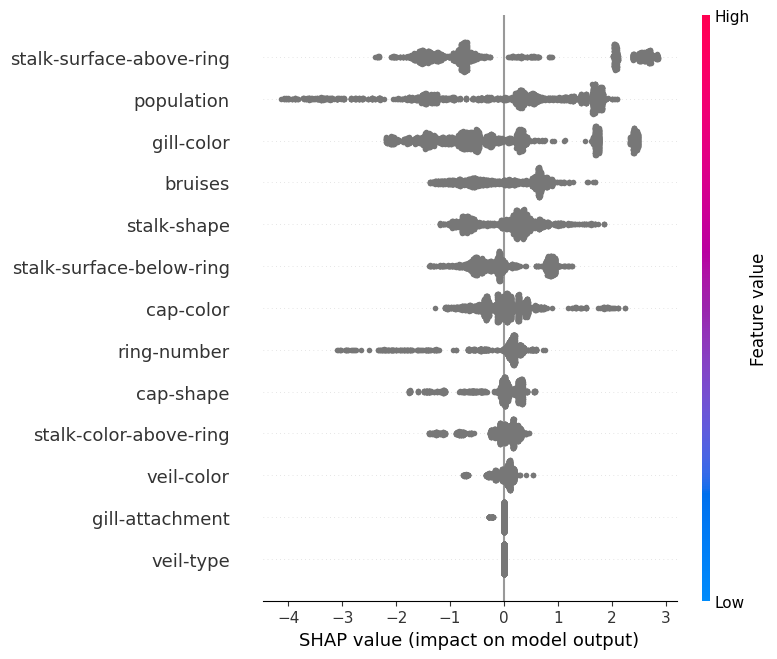

In [115]:
shap_values = model.get_feature_importance(data_test, 'ShapValues')
shap_values = shap_values[:, :-1] # последний столбец -- среднее значение "функции" (оно одинаково для всех. это свободный член)
shap.summary_plot(shap_values, X_test)

# окраски нет, потому что данные категориальные, а их кодирование в числа происходит внутри 

In [116]:
X_test.shape

(2031, 13)

# Практика

In [137]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import shap

In [14]:
from sklearn import set_config
set_config(transform_output='pandas')

In [8]:
from sklearn.datasets import load_digits # MNIST

In [9]:
X, y = load_digits(n_class=10, return_X_y=True, as_frame=False)

In [10]:
X.shape

(1797, 64)

In [11]:
y.shape

(1797,)

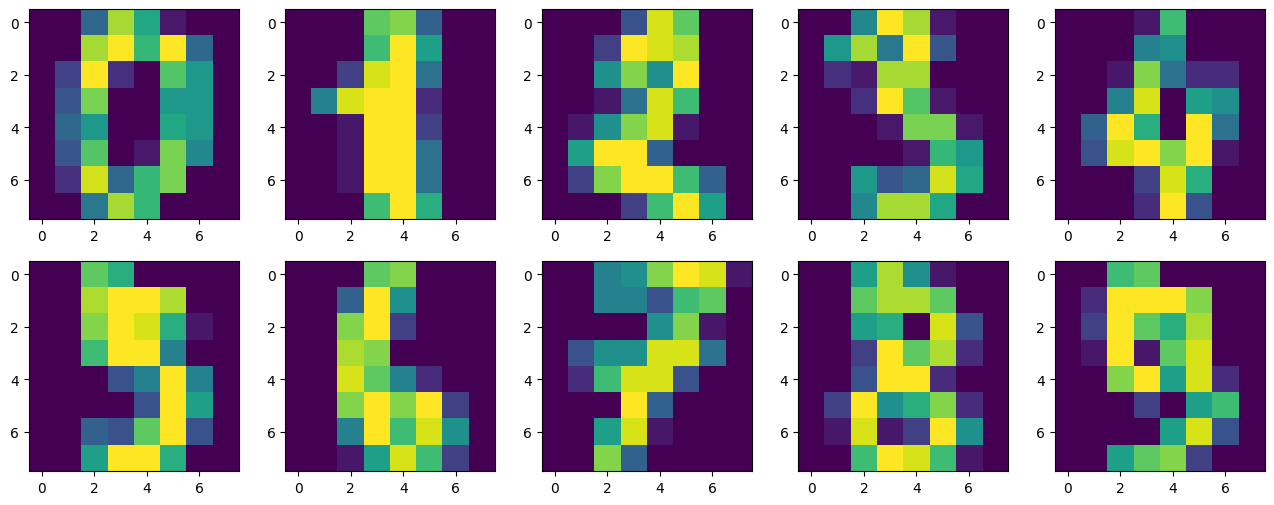

In [12]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

# PCA (reduce dimnesions)

In [15]:
# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled.agg(['mean', 'std']).round(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
std,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
k = 50
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [30]:
X_pca.head(1)

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49
0,-1.914214,-0.954502,-3.946035,-2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.013868,0.045772,0.286572,-0.485763,0.426979,-0.147594,-0.10029,0.420029,0.179378,-0.154212


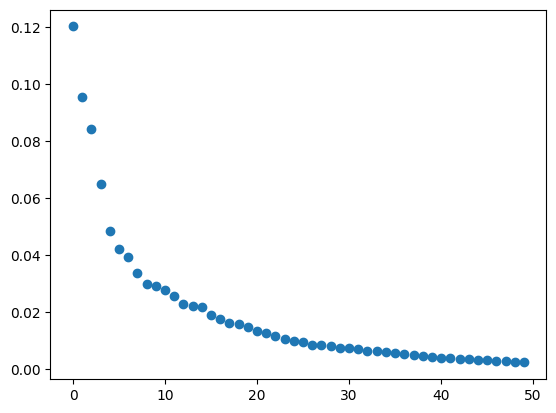

In [31]:

plt.scatter(
    np.arange(k),
    pca.explained_variance_ratio_
)
plt.show()

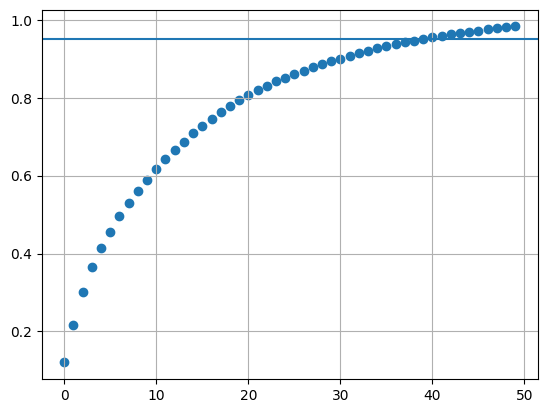

In [34]:
plt.scatter(
    np.arange(k),
    np.cumsum(pca.explained_variance_ratio_)
)
plt.axhline(0.95)
plt.grid()
plt.show()

In [41]:
X_pca.iloc[:, :40].agg(['mean', 'std']).T.round(4)

,mean,std
pca0,0.0,2.7101
pca1,0.0,2.4157
pca2,-0.0,2.2702
pca3,0.0,1.9915
pca4,0.0,1.7223
pca5,-0.0,1.6038
pca6,-0.0,1.5511
pca7,0.0,1.4383
pca8,0.0,1.3528
pca9,0.0,1.3377


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_pca.iloc[:, :40], y, random_state=15062023, test_size=0.25)

In [52]:
pd.Series(y).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [60]:
best_metrics = {}

# Многоклассовая логистическая регрессия

In [46]:
np.linspace(-2, 2, 20)

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

In [49]:
np.power(10, np.linspace(-2, 2, 20)) 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [50]:
np.logspace(-2, 2, 20)

array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02])

In [59]:
model = LogisticRegression()

params = [
    {
        'penalty': [None],
        'solver': ['saga'],
    },
    {
        'penalty': ['l1', 'l2'],
        'solver': ['saga'],
        'C': np.logspace(-2, 2, 10)
    },
    {
        'penalty': ['elasticnet'],
        'l1_ratio': [0.5],
        'solver': ['saga'],
        'C': np.logspace(-2, 2, 10)
    },
]

gscv = GridSearchCV(
    model, 
    param_grid=params,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
)

gscv.fit(X_train, y_train)

C:\Users\igumn\miniforge3\envs\hock\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': [None], 'solver': ['saga']},
                         {'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                          'penalty': ['l1', 'l2'], 'solver': ['saga']},
                         {'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                          'l1_ratio': [0.5], 'penalty': ['elasticnet'],
                          'solver': ['saga']}],
             scoring='accuracy')

In [61]:
y_pred = gscv.best_estimator_.predict(X_test)
best_metrics['LogisticRegression'] = round(accuracy_score(y_test, y_pred), 3)

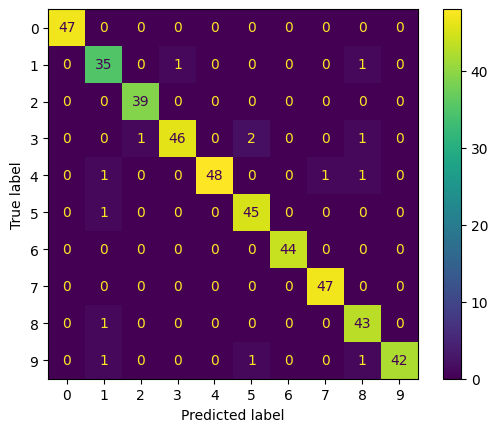

In [75]:
cm = confusion_matrix(y_test, y_pred, labels=gscv.classes_,) #  normalize='pred'

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gscv.classes_
                             )
disp.plot()
plt.show()

In [76]:
best_metrics

{'LogisticRegression': 0.969}

# Метод K-ближайших соседей

# SVM

In [106]:
model = SVC()

params = [
    {
        'kernel': ['linear'],
        'C': np.logspace(-2, 2, 10)
    },
    {
        'kernel': ['poly'],
        'C': np.logspace(-2, 2, 10),
        'gamma': ['scale', 'auto'],
        'degree': np.arange(2, 7)
    },
    {
        'kernel': ['rbf'],
        'C': np.logspace(-2, 2, 10),
        'gamma': ['scale', 'auto'],
    }
]

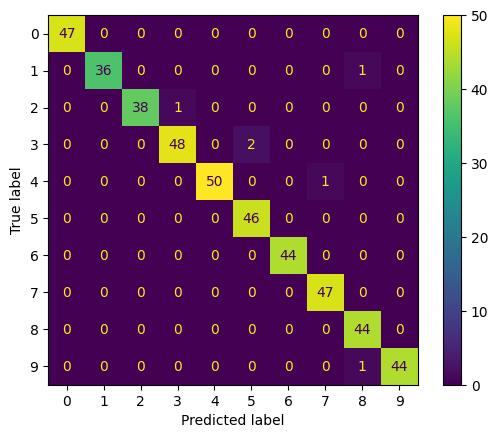

In [107]:
gscv = GridSearchCV(
    model, 
    param_grid=params,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
)

gscv.fit(X_train, y_train)

y_pred = gscv.best_estimator_.predict(X_test)
best_metrics['SVM'] = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred, labels=gscv.classes_,) #  normalize='pred'

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gscv.classes_
                             )
disp.plot()
plt.show()

In [108]:
gscv.best_params_

{'C': 4.6415888336127775, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [109]:
best_metrics

{'LogisticRegression': 0.969, 'SVM': 0.987}

# Случайный лес

In [110]:
model = RandomForestClassifier()

params = [
    {
        'n_estimators': [10, 50, 100, 300],
        'max_depth': [2, 3, 5, 7, 10, None],
        'max_features': ['sqrt', 'log2', 3],
        'n_jobs': [3]
    }
]

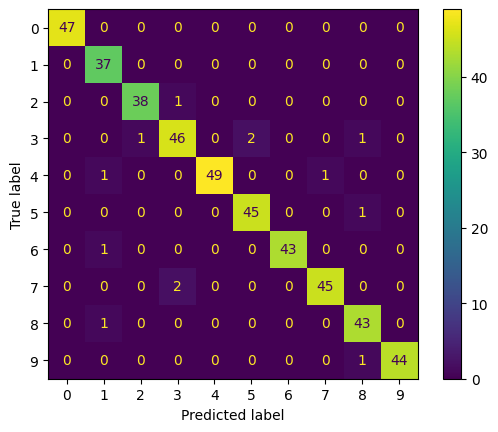

In [111]:
gscv = GridSearchCV(
    model, 
    param_grid=params,
    cv=5,
    n_jobs=3,
    scoring='accuracy',
)

gscv.fit(X_train, y_train)

y_pred = gscv.best_estimator_.predict(X_test)
best_metrics['RandomForest'] = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred, labels=gscv.classes_,) #  normalize='pred'

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gscv.classes_
                             )
disp.plot()
plt.show()

In [112]:
gscv.best_params_

{'max_depth': None, 'max_features': 3, 'n_estimators': 300, 'n_jobs': 3}

In [113]:
best_metrics

{'LogisticRegression': 0.969, 'SVM': 0.987, 'RandomForest': 0.971}

# Градиентный бустинг решающих деревьев

In [114]:
from catboost import CatBoostClassifier, Pool

In [131]:
model = CatBoostClassifier(metric_period=25, eval_metric='Accuracy', early_stopping_rounds=200)
model.fit(X_train, y=y_train, eval_set=(X_test, y_test))

Learning rate set to 0.108621
0:	learn: 0.6666667	test: 0.6377778	best: 0.6377778 (0)	total: 59.2ms	remaining: 59.2s


25:	learn: 0.9517446	test: 0.9311111	best: 0.9311111 (25)	total: 1.56s	remaining: 58.3s
50:	learn: 0.9740163	test: 0.9622222	best: 0.9666667 (47)	total: 2.94s	remaining: 54.6s
75:	learn: 0.9829250	test: 0.9622222	best: 0.9666667 (47)	total: 4.33s	remaining: 52.6s
100:	learn: 0.9940609	test: 0.9733333	best: 0.9733333 (93)	total: 5.65s	remaining: 50.3s
125:	learn: 0.9955457	test: 0.9755556	best: 0.9755556 (111)	total: 6.97s	remaining: 48.3s
150:	learn: 0.9977728	test: 0.9733333	best: 0.9755556 (111)	total: 8.39s	remaining: 47.2s
175:	learn: 1.0000000	test: 0.9755556	best: 0.9755556 (111)	total: 9.74s	remaining: 45.6s
200:	learn: 1.0000000	test: 0.9755556	best: 0.9777778 (190)	total: 11.1s	remaining: 43.9s
225:	learn: 1.0000000	test: 0.9755556	best: 0.9777778 (190)	total: 12.3s	remaining: 42.2s
250:	learn: 1.0000000	test: 0.9777778	best: 0.9777778 (190)	total: 13.7s	remaining: 40.9s
275:	learn: 1.0000000	test: 0.9800000	best: 0.9800000 (270)	total: 15s	remaining: 39.3s
300:	learn: 1.00000

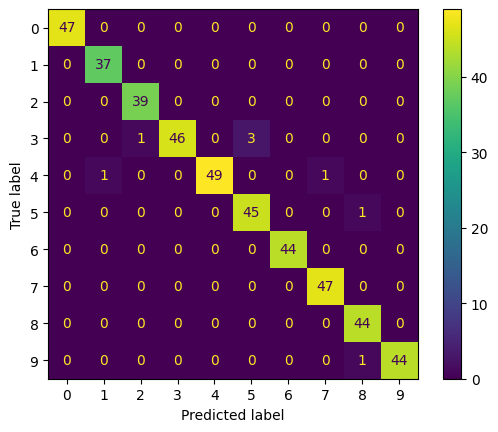

In [132]:
y_pred = model.predict(X_test)
best_metrics['CatboostClassifier'] = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred, labels=gscv.classes_,) #  normalize='pred'

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gscv.classes_
                             )
disp.plot()
plt.show()

In [133]:
best_metrics

{'LogisticRegression': 0.969,
 'SVM': 0.987,
 'RandomForest': 0.971,
 'CatboostClassifier': 0.982,
 'CatboostClassifier_Poly': 0.98}

In [135]:
pool_test = Pool(X_test, label=y_test)

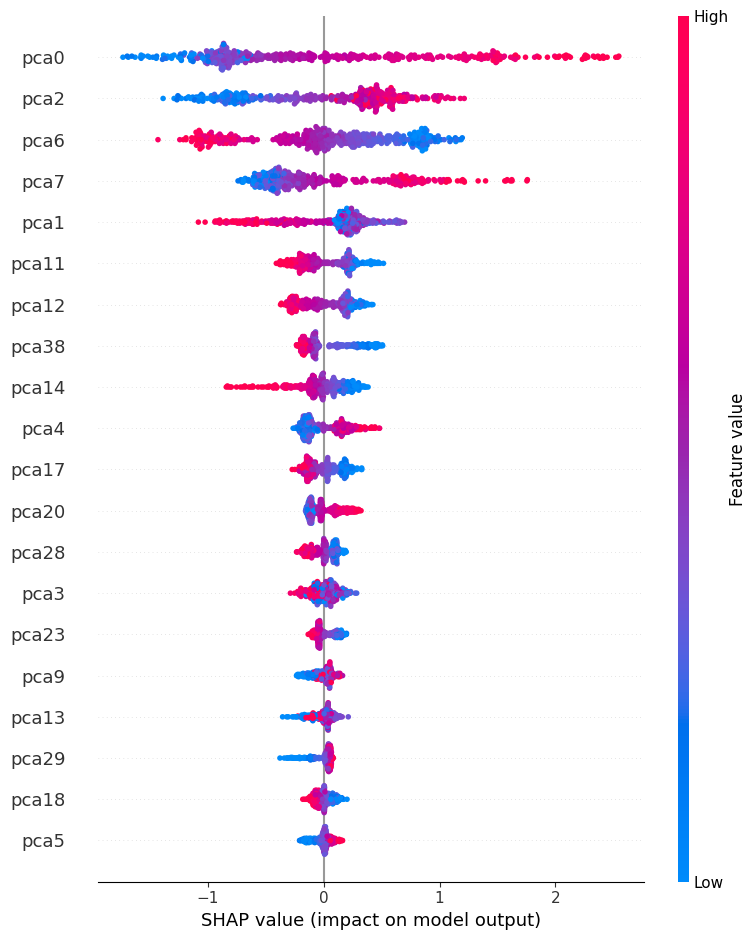

In [157]:
shap_values = model.get_feature_importance(pool_test, 'ShapValues')
# последний столбец -- среднее значение "функции" (оно одинаково для всех. это свободный член)
shap.summary_plot(shap_values[:, 2, :-1], X_test)

# окраски нет, потому что данные категориальные, а их кодирование в числа происходит внутри 

In [201]:
y_test[1]

1

In [222]:
target_digit = 1
expected_value = shap_values[1, target_digit, -1]
expected_value

-0.23326346556542055

In [223]:
1/(1+np.exp(-expected_value))

0.4419471255342306

$$Sigmoid(x) = \frac{1}{1+e^{-x}}$$

In [226]:
1/(1+np.exp(-5.38))

0.9954133127082959

In [227]:
shap.initjs()
shap.force_plot(expected_value, shap_values[1, target_digit, :-1], X_test.iloc[1, :], link ='identity', )

### catboost with polynomial features

In [232]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [233]:
X_train.shape, X_train_poly.shape

((1347, 40), (1347, 860))

Learning rate set to 0.108621


0:	learn: 2.0858897	test: 2.0852941	best: 2.0852941 (0)	total: 1.16s	remaining: 19m 15s
25:	learn: 0.6522247	test: 0.7463469	best: 0.7463469 (25)	total: 29.5s	remaining: 18m 26s
50:	learn: 0.3847700	test: 0.5079320	best: 0.5079320 (50)	total: 56.3s	remaining: 17m 28s
75:	learn: 0.2541477	test: 0.3874565	best: 0.3874565 (75)	total: 1m 20s	remaining: 16m 13s
100:	learn: 0.1785453	test: 0.3088563	best: 0.3088563 (100)	total: 1m 41s	remaining: 15m 7s
125:	learn: 0.1416825	test: 0.2730193	best: 0.2730193 (125)	total: 2m 3s	remaining: 14m 18s
150:	learn: 0.1212156	test: 0.2540125	best: 0.2540125 (150)	total: 2m 25s	remaining: 13m 36s
175:	learn: 0.1058925	test: 0.2404164	best: 0.2404164 (175)	total: 2m 46s	remaining: 13m 1s
200:	learn: 0.0930499	test: 0.2255573	best: 0.2255573 (200)	total: 3m 8s	remaining: 12m 30s
225:	learn: 0.0811306	test: 0.2115596	best: 0.2115596 (225)	total: 3m 30s	remaining: 11m 59s
250:	learn: 0.0715416	test: 0.2015508	best: 0.2015508 (250)	total: 3m 51s	remaining: 11

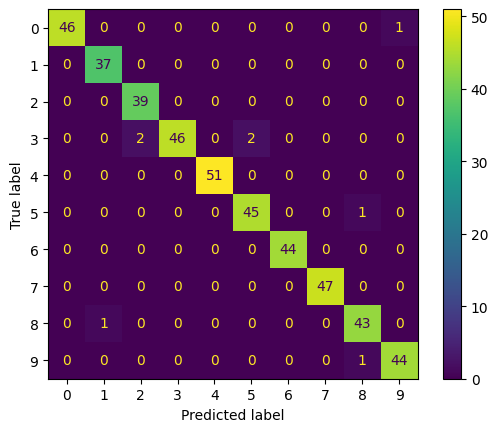

In [234]:
model = CatBoostClassifier()
model.fit(X_train_poly, y=y_train, metric_period=25, eval_set=(X_test_poly, y_test), early_stopping_rounds=200)

y_pred = model.predict(X_test_poly)
best_metrics['CatboostClassifier_Poly'] = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred, labels=gscv.classes_,) #  normalize='pred'

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=gscv.classes_
                             )
disp.plot()
plt.show()

In [235]:
best_metrics

{'LogisticRegression': 0.969,
 'SVM': 0.987,
 'RandomForest': 0.971,
 'CatboostClassifier': 0.982,
 'CatboostClassifier_Poly': 0.982}